In [1]:
from keras_cv.models.stable_diffusion.clip_tokenizer import SimpleTokenizer
import tensorflow as tf 

tokenizer = SimpleTokenizer()
MAX_PROMPT_LENGTH = 77
def generate_tokens(tokenizer, prompt, MAX_PROMPT_LENGTH):

  inputs = tokenizer.encode(prompt)
  if len(inputs) > MAX_PROMPT_LENGTH:
      raise ValueError(
          f"Prompt is too long (should be <= {MAX_PROMPT_LENGTH} tokens)"
      )
  phrase = tf.concat([inputs, ([49407] * (MAX_PROMPT_LENGTH - len(inputs)))], axis=0)

  return phrase

tokens = generate_tokens(tokenizer, "a ferrari car with wings", MAX_PROMPT_LENGTH)
print(tokens)

You do not have pycocotools installed, so KerasCV pycoco metrics are not available. Please run `pip install pycocotools`.
You do not have pyococotools installed, so the `PyCOCOCallback` API is not available.
You do not have Waymo Open Dataset installed, so KerasCV Waymo metrics are not available.
tf.Tensor(
[49406   320  9606  1615   593  5178 49407 49407 49407 49407 49407 49407
 49407 49407 49407 49407 49407 49407 49407 49407 49407 49407 49407 49407
 49407 49407 49407 49407 49407 49407 49407 49407 49407 49407 49407 49407
 49407 49407 49407 49407 49407 49407 49407 49407 49407 49407 49407 49407
 49407 49407 49407 49407 49407 49407 49407 49407 49407 49407 49407 49407
 49407 49407 49407 49407 49407 49407 49407 49407 49407 49407 49407 49407
 49407 49407 49407 49407 49407], shape=(77,), dtype=int32)


In [7]:
stable_diffusion_service_ip = input("Please enter the service IP address of the cluster: ")
print(f"Setting the IP address to: {stable_diffusion_service_ip}")

Please enter the service IP address of the cluster34.27.239.68
Setting the IP address to: 34.27.239.68


In [5]:
import requests
import json
import numpy as np
import time

tokens = generate_tokens(tokenizer, "A wine glass made from lego bricks, rainbow colored liquid being poured into it, high detail, blue eyes", MAX_PROMPT_LENGTH).numpy().tolist()
negative_tokens = generate_tokens(tokenizer, "low quality, ugly, bad anatomy, unnatural, strange", MAX_PROMPT_LENGTH).numpy().tolist()

data = json.dumps(
    {
        "signature_name": "serving_default", 
        "instances": [
            {
                "tokens": tokens,
                "negative_prompt_tokens": negative_tokens,
                "num_steps": 30,
                "batch_size": 1,
            }
        ]
     }
)

url = f"http://{stable_diffusion_service_ip}:8501/v1/models/stable-diffusion:predict"

def predict_rest(json_data, url):
    json_response = requests.post(url, data=json_data)
    response = json.loads(json_response.text)
    if "predictions" not in response:
      print(response)
    rest_outputs = np.array(response["predictions"])
    return rest_outputs

t1 = time.perf_counter()
out = predict_rest(data, url)
t2 = time.perf_counter()

print(f"It took {t2-t1}s to generate the images")

It took 217.4363518s to generate the images


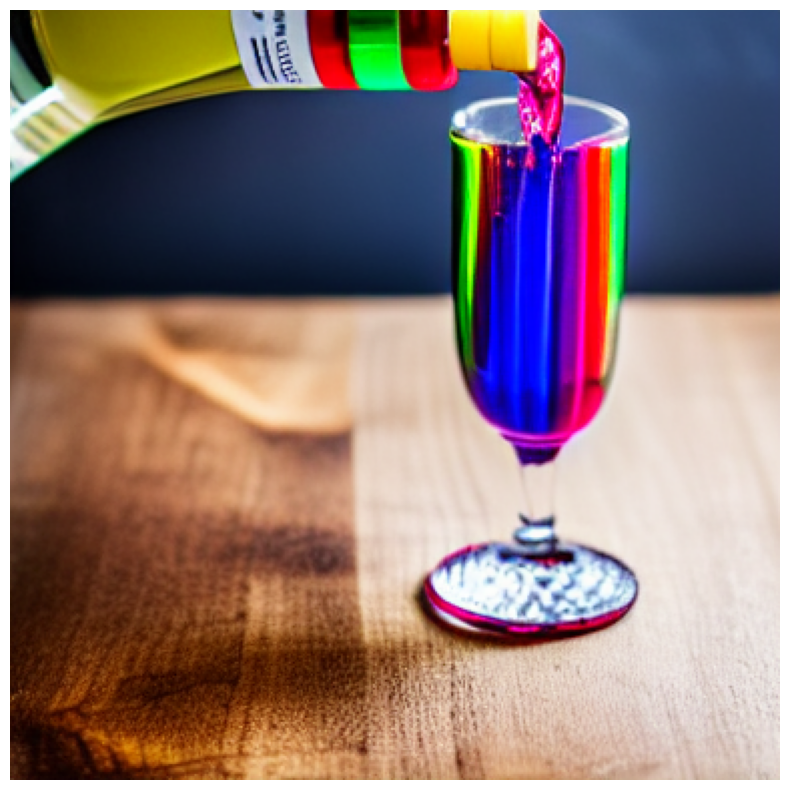

In [6]:
import matplotlib.pyplot as plt

def plot_images(images):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(out)